<a href="https://colab.research.google.com/github/daradanci/MMO_2025/blob/main/notes/LR2_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Зелинский Даниил, ИУ5-25М, ЛР2

# Лабораторная работа: Обработка признаков (часть 1)

## Описание выбранного датасета

Для выполнения лабораторной работы был выбран датасет **Life Expectancy Data**, содержащий информацию о продолжительности жизни населения в разных странах за период с 2000 по 2015 год.

Датасет включает следующие типы признаков:
- **Категориальные**: название страны (`Country`), статус страны (`Status`) — развивающаяся или развитая;
- **Числовые**: ожидаемая продолжительность жизни, уровень смертности, расходы на здравоохранение, ВВП на душу населения и другие показатели.

В датасете присутствуют **пропущенные значения** в ряде признаков, что делает его подходящим для изучения методов обработки неполных данных.

---

- **Country** — название страны.
- **Year** — год наблюдения.
- **Status** — статус страны (Developed/Developing).
- **Life expectancy** — ожидаемая продолжительность жизни.
- **Adult Mortality** — уровень смертности взрослого населения (на 1000 человек).
- **infant deaths** — количество младенческих смертей.
- **Alcohol** — потребление алкоголя на душу населения.
- **percentage expenditure** — процентные расходы на здравоохранение относительно ВВП.
- **Hepatitis B** — охват вакцинацией от гепатита B (в процентах).
- **Measles** — количество случаев кори.
- **BMI** — средний индекс массы тела.
- **under-five deaths** — смертность детей до 5 лет.
- **Polio** — охват вакцинацией от полиомиелита.
- **Total expenditure** — совокупные расходы на здравоохранение.
- **Diphtheria** — охват вакцинацией от дифтерии.
- **HIV/AIDS** — уровень смертности от ВИЧ/СПИДа.
- **GDP** — валовой внутренний продукт на душу населения.
- **Population** — численность населения.
- **thinness 1-19 years** — доля худощавых детей и подростков 1–19 лет.
- **thinness 5-9 years** — доля худощавых детей 5–9 лет.
- **Income composition of resources** — индекс распределения доходов.
- **Schooling** — среднее количество лет обучения.


In [39]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Настройка отображения графиков
%matplotlib inline
sns.set(style="whitegrid")

In [37]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [38]:
# --- 1. Анализ пропусков ---
print("Пропуски в каждом столбце:\n", df.isnull().sum())


Пропуски в каждом столбце:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [41]:

# Первичный просмотр данных
print("\nРазмерность датафрейма:", df.shape)
display(df.head())


Размерность датафрейма: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [44]:
# Анализ пропусков
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Пропущено': missing_values, '%': missing_percent})
missing_df = missing_df[missing_df['Пропущено'] > 0].sort_values(by='%', ascending=False)

print("\nПризнаки с пропущенными значениями:")
display(missing_df)



Признаки с пропущенными значениями:


,Пропущено,%
Population,652,22.191967
Hepatitis B,553,18.822328
GDP,448,15.248468
Total expenditure,226,7.692308
Alcohol,194,6.603131
Income composition of resources,167,5.684139
Schooling,163,5.547992
thinness 5-9 years,34,1.157250
thinness 1-19 years,34,1.157250
BMI,34,1.157250


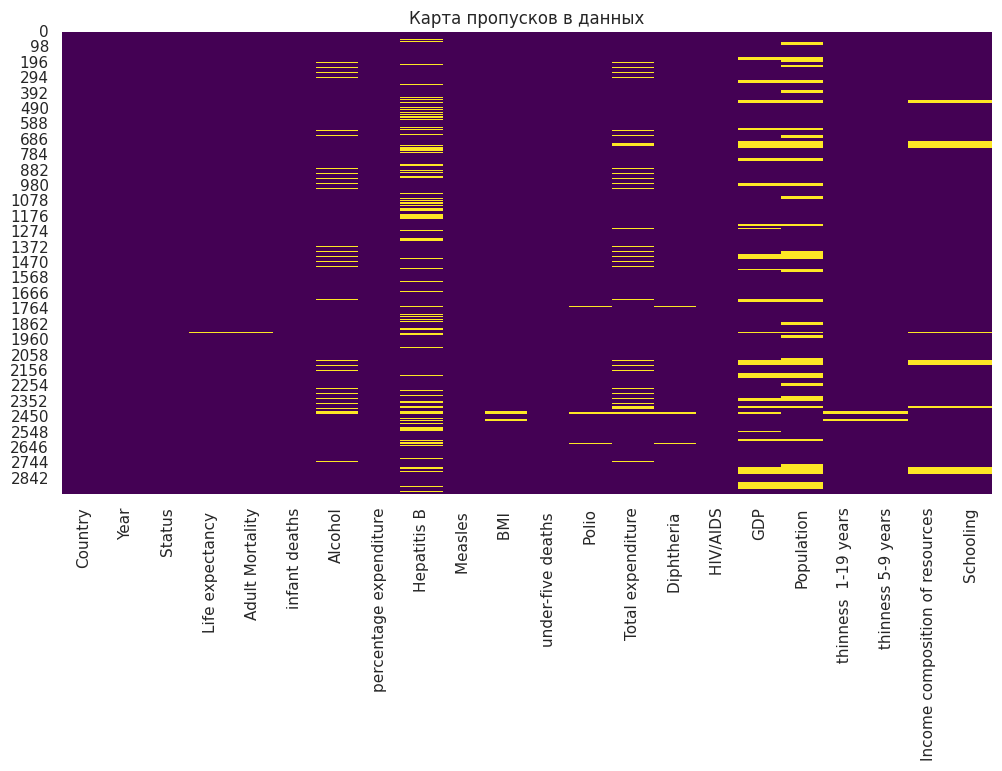

In [45]:
# Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Карта пропусков в данных")
plt.show()


In [46]:
# Устранение пропусков
# Определение типов признаков
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [47]:
# Создание импьютеров
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [48]:
# Заполнение пропусков
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])


In [49]:

# Проверка результата
print("\nОстались ли пропуски после заполнения:")
print(df.isnull().sum().sum())


# Числовые признаки заполнены медианой.

# Категориальные признаки — заполнены наиболее частым значением.


Остались ли пропуски после заполнения:
0


In [51]:
# Кодирование категориальных признаков (только 'Status')
print("\nКатегориальные признаки:", categorical_features)

# Кодируем только 'Status', а 'Country' оставляем как есть
categorical_to_encode = ['Status']
df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

print("\nРазмерность после кодирования:", df_encoded.shape)
display(df_encoded.head())



Категориальные признаки: ['Country', 'Status']

Размерность после кодирования: (2938, 22)


,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


In [52]:

# Нормализация числовых признаков
# Определим числовые признаки (исключая 'Country')
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("\nПервые строки нормализованных числовых признаков:")
display(df_encoded[numeric_cols].head())



Первые строки нормализованных числовых признаков:


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,-0.445408,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,0.255359,-3.279423,0.931485,-0.735391,-0.323445,-0.453371,0.435183,2.815209,2.775386,-0.737973,-0.585017
1,1.404986,-0.981827,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,0.274060,-1.053699,0.939818,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,2.819978,-0.752600,-0.615649
2,1.188210,-0.981827,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,0.292761,-0.882489,0.918987,-0.777671,-0.323445,-0.449799,0.398066,2.928926,2.864570,-0.781853,-0.646281
3,0.971434,-1.023899,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,0.317696,-0.668478,1.081463,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,2.931458,-0.815982,-0.676912
4,0.754658,-1.055453,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,0.342631,-0.625675,0.810670,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,2.976051,-0.859862,-0.768808
